  
Supplementary code for the MPC Monetary Experiment paper
============

## **"Cake-eating algorithm" based simulations**

Here is an interactive Notebook to load and play directly with the Matlab code used in the MPC Monetary Experiment paper (available here), adapted from the Bogomolnaia and Moulin cake eating algorithm paper (2001). Please allow Binder to be loaded (<1 min), then you can look at the code, change parameters and run cell by cell as in any Jupyter Notebook (Maj+Enter to run each cell once, or use menu shortcut to run all cells under Cell > "Run All").  

**The models and graphs presented here aim at highlight how international trade produces**
- naturally one "safest" reserve currency, not necessarily linked to trade volume or surplus
- this tendency of a trade "winner takes all" is inherent to any groups of trading countries
- how good or bad the winner of a trade group will be does not depend only on the size of the trade group - the worse-off countries of a big trading group can be worse than countries' in smaller trade groups
- initial conditions are important in the short-medium term, but not for the long run ; Triffin events do exists here, but are gradual in this model (and in practice)

Based on this model we make the argument that **trade winner countries should have some monetary redistribution and stabilization schemes, and that unique and unstable monetary anchors are not the only possible solutions to the Mundell's redundancy problem.** We hence derive an example of such monetary redistribution and stabilization scheme in our paper.

The other simulations used in the paper can be also found here *(for simulation of the monetary system, 1945-now)*, here *(for different debt sustainability scenarii after Covid-19)*, and here *(for "cake-eating algorithm" based simulations with our redistribution and stabilization scheme).*

Note that here all commands are interpreted by Octave instead of Matlab as the code is originally intended to. There are only two differences - the digraph function to plot the trade preference among countries graph, and the sprandsym (random initialization of the trade preference graph) function which is slightly more elaborate in Matlab. Both original Matlab codes and Octave code for these two points are explicit here (cell and cell), with more details if you want to copy paste the code and run in Matlab insteaed of here. 

*Help on commands is available using the `%help` magic or using `?` with a command.*

Please feel free to reach back to nxyzhang@mit.edu, and to play/expand the model at will !


In [ ]:
# Exogeneous parameters of the simulation to be played with 

number_of_countries = 6 %total number of countries in the simulation
number_of_rounds = 7 %total number of "cake eating rounds" 

interest_rate = (0.03).*ones(number_of_countries,1); %initial interest rates - more below on how interest rates change according to how successfully debt is absorbeb at each round.
interest_rate_history = zeros(number_of_countries,number_of_rounds);

uni=0.7;%uni is used in the random generation of the trade preference matrix - a number_of_countries x number_of_countries matrix in which the number line i, column j indicates how interconnected the economies of countries i and j are. This random generation is done with the function R = sprandsym(n,density) - in our case n=number_of_countries and density = uni, which returns a symmetric random, n-by-n, sparse matrix with approximately density*n*n nonzeros; each entry is the sum of one or more normally distributed random samples, and (0 <= density <= 1) .For calibration uni=0.3 creates with good probability if there are 6 countries in total 3 trade coalitions, one with 3 countries, one with 2, and 1 in autarky.

%If we were in Matlab we would have added the parameter rc=0.02, still for this sprandsym function, which denotes how inequal trade between countries can be (the smaller the more). Indeed,  R = sprandsym(n,density,rc) returns a matrix with a reciprocal condition number equal to rc. The distribution of entries is nonuniform; it is roughly symmetric about 0; all are in [−1,1]. If rc is a vector of length n, then R has eigenvalues rc. Thus, if rc is a positive (nonnegative) vector then R is a positive (nonnegative) definite matrix. In either case, R is generated by random Jacobi rotations applied to a diagonal matrix with the given eigenvalues or condition number. 

## Examples of figures from paper that can be obtained with this notebook : 

**First a 6 countries in 3 trade groups, 7 rounds simulation (just 7 rounds are enough to see trends !)**

From this first short simulation note that :

- the size of cakes, eating speed etc... tend to powers law i.e. one country (here country 1) gains much more than any more in that trading group (mathematical proof in paper). Intuition is that as it is perceived "safer" by other countries (because it devalues less) the "cakes" (debts) it generates are always eaten first by other countries, and thus incentivizes (through lower interest rate) country 1 to generate bigger cake, invest more in its cake eating speed, invest more in other countries' debts as well, etc.

- the country that would gain the most is determined by initial conditions (in this very easy example everything is initialized at random, but looking at the initial ranking - the higher the score the most sought after a ranking is - and the initial interest rate we can tell us that country 1 will be winning !)

- the country that would gain the most in a short run trade group is not necessarily the one determined by fundamentals - i.e. not the most connected one or the most prudent one *(in the trade group between country 1, 4 and 6 country 1 is neither the most connected - since country 6 has more connections than it does - nor the most self preserving - since country 4 ranks its own debts to others' higher first)*

<img src="Screen%20Shot%202020-04-02%20at%2010.14.45%20AM.png" />  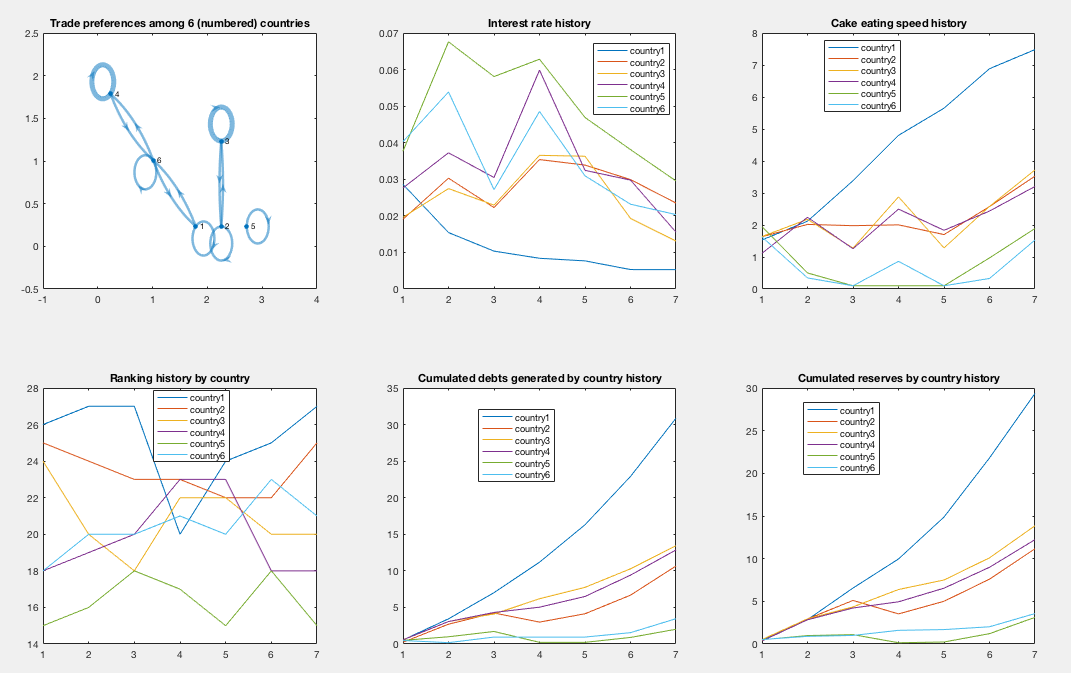


**A second 6 countries in 3 trade groups, 7 rounds simulation**

- Here the winner is country 3 - which is less connected (only to country 5) than the cluster with countries 1, 2 and 4

- The worse off country in the group (1, 2 and 4) is doing even worse than country 6 in autarky (extreme case of the model, because country 4 started (randomly) at the least preferred country in country rankings, and failed to get its cakes eaten at the end of round 1, thus devalues round 2, its interest rate surge, and it gets stuck in a devaluation sprial from round 1 to 4.

- Note that here country 1 had better initial conditions to be the be winner of the simulations (best ranked country at the start, lowest interest rate at the start). But its trading partners - country 2 and 4, are the ones devaluing the most 

<img src="Screen%20Shot%202020-04-02%20at%2010.44.32%20AM.png" /> 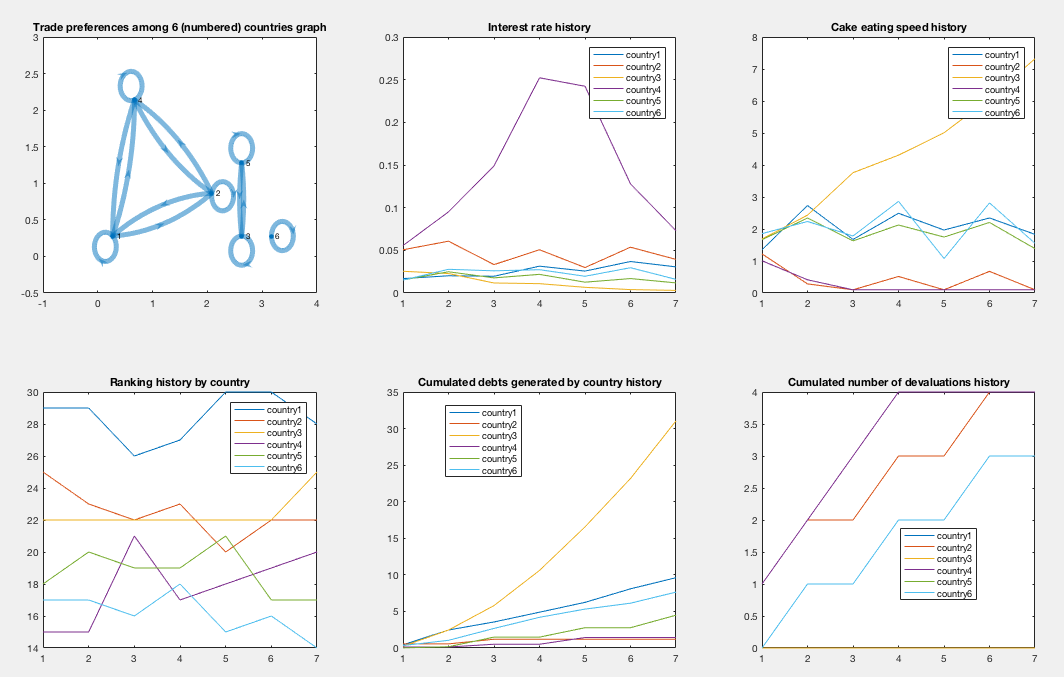


**Finally a 9 countries, 1000 rounds simulation**

The figures below illustrate the long rung trends in this model :

- Reduction of average global rates can happen (see rounds 120 to 220 on both the cumulated. This is when the total eating speed is faster than the timer, hence the reduced number of devaluations rounds 120 to 220 

- Triffin events exist : the yellow country (country 3) started as the winner of this simulation, until around round 220 at which point it is overtaken by country 1 in deep blue and don't stop devaluing until the end of the 1000 rounds. This corresponds to fundamental analysis (country 3 is only trading with 2 countries whereas country 1 with 4. But countries 6 and 9 for instance are both connected to 4 trading partners, with stronger ties among some of them and with themselves. These two countries are respectly the 2nd and 3rd most sought after countries, both in rankings, in upward trends in rankings, and in how much of their cakes are absorbed by others as reserve).

*Note that these long term analysis will be nuanced by a more calibrated simulation in the notebooks on 1945-now and after Covid-19, available here and here, in which the cake eating speed and cake generation speed are governed by more complicated but more realistic 

<img src="Screen%20Shot%202020-04-02%20at%2011.07.19%20AM.png" /> 

<img src="Screen%20Shot%202020-04-02%20at%2010.55.01%20AM.png" /> 


In [ ]:
# We initialize here the recording vectors that will collect the history of the simulation, to plot the graphs at the end of this notebook

endowments_reserves_history = zeros(number_of_countries,number_of_rounds); %The records of how much cakes in total each country has accumulated at each round (see cell just below for the definition of a cake)
endowments_debts_history = zeros(number_of_countries,number_of_rounds); %The records of how much cakes (ie debts) in total each country has generated up to round t (see cell just below for the definition of a cake)
sum_cakes_history = zeros(1,number_of_rounds); %The records of each country's cake size for each round (see cell just below for the definition of a cake)
sum_of_generated_cakes = 0; %for cumulated

abso_speed_history = zeros(number_of_countries,number_of_rounds); %The records of the eating speed of each country for each round (see cell just below for the definition of the eating speed)
abso_history = zeros(1,number_of_rounds); 
sum_of_abso_speed = 0; %for cumulated

devaluation_history = zeros(number_of_countries,number_of_rounds); %The records of the cumulated number of times which each country devalued up to round i
ranking_history = zeros(number_of_countries,number_of_countries); %The records of the order in which each country ranked other countries' cake to be eaten at each round(see cell just below for the definition of a cake)
history_counter = ones(number_of_countries,1); %used in which round to determine sizes of generated cakes and cake eating speeds (see within round cell below)
deval_history = zeros(number_of_countries,1); %idem

duration_T_updated_history = zeros(1,number_of_rounds); %The records of how long was the timer for each round (see cell just below for the definition of a timer)


In [ ]:
# We initialize here the intermediary parameters that will be used within each round

endowments = zeros(number_of_countries,number_of_countries); % Where countries store what "cakes" (debts) they ate during each round. At the end of each round a country's cake that hasn't been totally eaten will decrease the parts of all reserves that contained pieces of cakes (from all previous rounds, not just this round) from that country (it's a devaluation - and we record it in deval_history = deval_history + 1). Else if the cake has been totally it counts as a success and we record it in history_counter = history_counter + 1 
abso_speed = 100.*rand([number_of_countries,1]); % The eating speed of the countries - here initialized at random. During the rest of the game these speed will evolve depending on the history_counters and devaluation_counters of each country
abso_speed_init = abso_speed;

initial_pos = 100.*rand([number_of_countries,1]); % Cakes generated by each country, initialized at random. Then at the start of each round the size of cakes being generated by each country are function of how safe this country is (history_counter - deval_history) plus a random number different for each country (see further in the code)
initial_pos_init =initial_pos;
initial_pos_round = initial_pos;
cakes_from_previous_round = initial_pos; 

duration_T = 1; % There's a timer for each rouund. A round ends when this timer ends, or when countries ate all the cakes if faster than the timer (the timer changes at each round depending on the total cake sizes and total eating speed ratio, so that it increases rather steadily)
fraction_ranking = (1/3); % Used for calibration
duration_T_updated = duration_T;


successfully_loaded_cake_last_round = zeros(number_of_countries,1);


Bogomolnaia and Moulin's cake eating algorithm (2001)
=======

Time is discrete, in rounds.
During each round each country generates one "cake" (debt), and simultaneously eats each others' cakes at different speed and following different rankings (so when a piece of cake is finished the countries that were eating eat move to the item below in their rankings). Each country stores what he ate in his reserves - the endowments. More below on how rankings and cakes are generated by each country at each round, and on how endowments change according to countries' behaviours).
    
Note that this model has good properties for **fair treatments of equals** and related axiomatic treatment (which is what Bogomolnaia and Moulin's main intent was in their 2001 paper). We adapted it to bring it closer to a macro setting, and concretely implemented and calibrated it.
 
*Additional factors to keep in mind in the code below :*
   - How trade preferences are initialized matter - can be played with extensively.
   - How "cakes" (debts) generation and cake eating speed evolve matter (several different options, discussed between this notebook and the 1945-now calibrated simulation notebook"
   

In [ ]:
# random initialization of ranking between countries, before it is impacted by trade preference and readjusted within each rounds
ranked_list = zeros(number_of_countries,number_of_countries);

for j=1:number_of_countries
    ranked_list(j,:) = randperm(number_of_countries);
end

In [ ]:
# Initialization of trade preference, and impact on ranking among countries just defined above.
% NOTE THAT THESE CAN BE PLAYED AROUND, AND CALIBRATED AS IN THE 1945-NOW Notebook !!! 

trading_preferences = ceil(abs(full(sprandsym(number_of_countries,uni)))); %NOTE THAT IN MATLAB FULL CODE IS 
%trading_preferences = ceil(abs(full(sprandsym(number_of_countries,uni,rc,2)))); with rc discussed in the intro, for unequality in initial distribution

for k=1:number_of_countries
% we first find a country's preferred trading partners and rank them among themselves

    [~,trading_order]=sort(trading_preferences(k,:).*(ones(1,number_of_countries)+endowments(k,:)),'descend'); %we rank by first trade preference, then by the size of trading partners. Note that this is modelled more finely in the 1945-now simulation notebook 
    % the 1945-now version : 
    %[~,trading_order]=sort(trading_preferences(k,:).*(ones(1,number_of_countries)+max(0,successfully_loaded_cake_last_round(k,1).*(history_counter(k,1)-deval_history(k,1)).*endowments(k,:)*(interest_rate(k,1)))),'descend');
        
    
    % then we adjust the country's rankings by moving these trading partners up the list
    res=sum(trading_preferences(k,:)~=0);
    
    if res>0
        for l=1:res
            ressort_count=find(ranked_list(k,:)==trading_order(l));
            if ressort_count>l
                for m=1:(ressort_count-l)
                    ranked_list(k,ressort_count+1-m)=ranked_list(k,ressort_count-m);
                end
                ranked_list(k,l)=trading_order(l);
            else
            end
        end
    end
    
end
ranked_list_true_init = ranked_list %print this ranking matrix so that you can see; each line i is the ranking list of a country i, from top priority left to last choice right. 

Discussion on trade preferences in our model
=======

**We can see above how the impact of trade preferences on how countries rank others is different between this generic model and the one in the 1945-now simulation.** 

In this version here for each country we sort only by its trading preferences, weighted by how much reserves each trading partners have. In the 1945-now simulation version the weights are slightly different : they also integrate the notion of how "safe" a country is - through the number of times these countries held their currencies steady vs devalued so far, and through if they just devalued the previous round.

*The relevant lines of code in the cell above are : 
- [~,trading_order]=sort(trading_preferences(k,:).*(ones(1,number_of_countries)+endowments(k,:)),'descend'); %in this version 
and
- [~,trading_order]=sort(trading_preferences(k,:).*(ones(1,number_of_countries)+max(0,successfully_loaded_cake_last_round(k,1).*(history_counter(k,1)-deval_history(k,1)).*endowments(k,:)*(interest_rate(k,1)))),'descend'); %in the 1945-now version 
    
*The reserves accumulated by a country i - read as the lines i of the endowments matrix - are used as proxy of the size of its economy in our model. The columns j of the endowments matrix are read as the cakes generated by country j. So the endowments matrix is really just keeping in time record of how much each country i is holding debts from each other country j. 

The one example of graphs from the 1945-now presented below shows how for instance this modification stabilize more the trading preferences over time, as compared on the graphs from this version presented at the start of this notebook (*note that the different shapes and behaviours of the reserves and debts graphs between the two versions also come from difference in modelling, that will be discussed below*).
   
<img src="Screen%20Shot%202020-04-02%20at%205.30.10%20PM.png" /> 
   

In [ ]:
# Now we go into rounds of cake eating, that are looped over. Everything important happens in this cell !


for i=1:number_of_rounds
    
    cakes = max(0,successfully_loaded_cake_last_round.*(history_counter-deval_history)+rand([number_of_countries,1]));
    abso_speed = max(0.1,(history_counter-deval_history)+rand([number_of_countries,1]));
    % At the start of the round cakes (ie debt) are generated by each country, and each country is assigned a new eating speed, both depending only on how successful it history is in getting its debt absorbed.
    % Plus we just add a bit of random perturbations to make it more realistic. But very simple model here, that is made more sophisticated in the other simulations (see the two other notebooks

    %we record all of this for graphs later
    cakes_from_previous_round = cakes; 
    sum_of_generated_cakes = sum_of_generated_cakes + cakes;
    sum_of_abso_speed = sum_of_abso_speed + abso_speed;
    abso_history(1,i)=sum(abso_speed);
    sum_cakes_history(1,i)=sum(cakes);
    initial_pos_round = cakes;
    
    % The counter of a round is set up as the max cake size generated at this round
    duration_T_updated = max(1,max(cakes));
    
    % We initialize the counting
    time_counter=0;
    cakes_counter=0;
    rank_counter = ones(number_of_countries,1);
    removed_cake_row = zeros(number_of_countries,1);
    k=1;
    latest_finished_cake = 0;
    will_be_totally_consumed = zeros(number_of_countries,1);
    
    % And the countries start eating ! Until all the cakes are eaten or the counter is down to zero.
    while (duration_T_updated>0 && cakes_counter<number_of_countries) 
    
        initial_pos_updated = cakes;
        diff_between_wished_and_offered = zeros(number_of_countries,1);
        
        % We go through the preference list of all the countries - if the cake item at the top of each country's remaining list is still there they'll eat it, else we move down an item in that country's list
        % For that we first figure out which cake pieces are sought after by the most countries x their eating speed
        for l=1:number_of_countries
            if removed_cake_row(ranked_list(l,1))>0
                o=1;
                u=1;
                if  removed_cake_row(ranked_list(l,o+1),1)>0
                    u=o+1;
                    while ((u<(number_of_countries-1)) && (removed_cake_row(ranked_list(l,u+1),1)>0))
                        u=u+1;
                    end
                    ranked_list(l,o)=ranked_list(l,u+1);
                else
                    ranked_list(l,o)=ranked_list(l,o+1);
                end
                rank_counter(j,1)=rank_counter(j,1)+1;
            end
        end
        
        for j=1:number_of_countries
            if removed_cake_row(j,1)>0
            else
                if sum(abso_speed(ranked_list(:,1)==j))>cakes(j,1)
                    will_be_totally_consumed(j,1)=will_be_totally_consumed(j,1)+1;
                    diff_between_wished_and_offered(j,1) = sum(abso_speed(ranked_list(:,1)==j))/initial_pos_updated(j,1);
                end
            end
        end
        
        if sum(diff_between_wished_and_offered)==0
            for j=1:number_of_countries
                if removed_cake_row(j,1)>0
                else
                    diff_between_wished_and_offered(j,1) = sum(abso_speed(ranked_list(:,1)==j))/initial_pos_updated(j,1);
                    will_be_totally_consumed(j,1)=will_be_totally_consumed(j,1)+1;
                end
            end
        else
        end
        
        % Now that we know which cake pieces are sought after by which countries x their eating speed we can sort them 
        [~,consumption_order]=sort(diff_between_wished_and_offered,'descend');
        
        % Just some safety checks 
        if sum(diff_between_wished_and_offered)==0
            [ii,jj]=find(~removed_cake_row);
            if size(ii)==1
                consumption_order(1)=ii;
            else
                for j=1:size(ii)
                    consumption_order(j)=ii(j);
                end
            end
        else
        end
        
       
       % Now we know which cake will be eaten ! 
       % Let's share it across countries according to their eating speed - we move these to the relevant slots in the endowments matrix.
        
       % With just a special attention if the cake piece being eaten won't be finished in time (the "else" to this "if" condition)
        if (duration_T_updated-cakes(consumption_order(1),1))>0
            duration_T_updated = duration_T_updated - cakes(consumption_order(1),1);
            for j=1:number_of_countries
                if ranked_list(j,1)==consumption_order(1)
                    endowments(j,consumption_order(1)) = endowments(j,consumption_order(1))+(abso_speed(j,1)./(sum(abso_speed(ranked_list(:,1)==consumption_order(1)))))*initial_pos_updated(consumption_order(1),1);
                elseif cakes(ranked_list(j,1),1)==0
                    removed_cake_row(ranked_list(j,1),1)=removed_cake_row(ranked_list(j,1),1)+1;
                else
                    endowments(j,ranked_list(j,1)) = endowments(j,ranked_list(j,1))+(abso_speed(j,1)*cakes(consumption_order(1),1))/(sum(abso_speed(ranked_list(:,1)==consumption_order(1))));
                    cakes(ranked_list(j,1),1)=initial_pos_updated(ranked_list(j,1),1)-(sum(abso_speed(ranked_list(:,1)==ranked_list(j,1)))*cakes(consumption_order(1),1))/(sum(abso_speed(ranked_list(:,1)==consumption_order(1))));
                end
            end
            time_counter = time_counter + cakes(consumption_order(1),1);
            cakes(consumption_order(1),1) = 0;
            removed_cake_row(consumption_order(1),1)=removed_cake_row(consumption_order(1),1)+1;
            
             % With just a special attention if the cake piece being eaten won't be finished in time (the "else" to this "if" condition)
        else
            cakes(consumption_order(1),1) = cakes(consumption_order(1),1) - duration_T_updated;
            time_counter = time_counter + duration_T_updated;
            for j=1:number_of_countries
                if ranked_list(j,1)==consumption_order(1)
                    endowments(j,consumption_order(1)) = endowments(j,consumption_order(1))+(abso_speed(j,1)./(sum(abso_speed(ranked_list(:,1)==consumption_order(1)))))*duration_T_updated;
                elseif cakes(ranked_list(j,1),1)==0
                    removed_cake_row(ranked_list(j,1),1)=removed_cake_row(ranked_list(j,1),1)+1;
                else
                    endowments(j,ranked_list(j,1)) = endowments(j,ranked_list(j,1))+(abso_speed(j,1)*duration_T_updated)/(sum(abso_speed(ranked_list(:,1)==consumption_order(1))));
                    cakes(ranked_list(j,1),1)=cakes(ranked_list(j,1),1)-(abso_speed(j,1)*duration_T_updated)/(sum(abso_speed(ranked_list(:,1)==consumption_order(1))));    
                end
            end
            duration_T_updated = 0; 
        end
        latest_finished_cake = consumption_order(1);
        
        cakes_counter = cakes_counter + 1;
        k=k+1;
        duration_T_updated_history(1,i)=duration_T_updated;
    end
    
    
    % At the end of a round we devalue all countries that didn't manage to get all its debt absorbed during this round, proportionally to how much of it is left at the end of the round
    for j=1:number_of_countries
        if (initial_pos_round(j,1)-cakes(j,1))>0
            endowments(:,j)=endowments(:,j)*((initial_pos_round(j,1)-cakes(j,1))/initial_pos_round(j,1));
        else
        end
        if cakes(j,1)==0
            history_counter(j,1) = history_counter(j,1) + 1;
            successfully_loaded_cake_last_round(j,1) = 1;
            interest_rate(j,1)=interest_rate(j,1)./(1+rand(1,1));
        else
            interest_rate(j,1)=min(1,max(interest_rate_history(j,1),interest_rate(j,1).*(1+rand(1,1))));
            deval_history(j,1) = deval_history(j,1)+1 ;
        end
    end
    
   
   % And we update the ranking list for each country after the events of this round, in a similar fashion as what happened initially on the cell just above on this notebook.
   [~,success_order]=sort(history_counter,'descend');
   ranked_list = repmat(success_order',number_of_countries,1);
   
   for k=1:number_of_countries    
       r1 = randperm(number_of_countries,2*round(number_of_countries*fraction_ranking));
       for j=1:round(number_of_countries*fraction_ranking)
           inter=ranked_list(k,r1(1,j));
           ranked_list(k,r1(1,j))=ranked_list(k,r1(1,2*j));
           ranked_list(k,r1(1,2*j))=inter;
       end
   end
   
   for k=1:number_of_countries
       [~,trading_order]=sort(trading_preferences(k,:).*(ones(1,number_of_countries)+max(0,successfully_loaded_cake_last_round(k,1).*(history_counter(k,1)-deval_history(k,1)).*endowments(k,:)*(interest_rate(k,1)))),'descend');
       res=sum(trading_preferences(k,:)~=0);
       if res>0
           for l=1:res
               ressort_count=find(ranked_list(k,:)==trading_order(l));
               if ressort_count>l
                   for m=1:(ressort_count-l)
                       ranked_list(k,ressort_count+1-m)=ranked_list(k,ressort_count-m);
                   end
                   ranked_list(k,l)=trading_order(l);
               else
               end
           end
       end
       interest_rate_history(k,i) = interest_rate(k,1);
   end
   ranked_list_init = ranked_list; 
   endowments_reserves_history(:,i) = sum(endowments,2);
   endowments_debts_history(:,i) = sum(endowments,1)';
   abso_speed_history(:,i) = abso_speed;
   devaluation_history(:,i) = deval_history;
   ranking_history(:,:,i) = ranked_list_init;
end

### That was the core of the simulation code ! Now one can just plot everything

So the graphs can either be all in one cell, or be plot individually one per cell. I'll let the reader copy paste the relevant pieces of code accordingly, that can be put in a following single cell as shown for example below.

*Also note that the digraph function used to plot the graph of the trade preferences among countries is not implemented yet in Octave. So the code is provided here but won't produce this specific graph.

In [ ]:
sum_ranking_history = zeros(number_of_countries,number_of_rounds);
i=1;
for j=1:number_of_countries
    tag{j}=strcat('country ',num2str(j));
    for k=1:number_of_countries
        [~,indexes]=sort(ranking_history(k,:,i));
        score_for_one_country = ((number_of_countries+1)*ones(1,1)-indexes);
        sum_ranking_history(j,1) = sum_ranking_history(j,1)+score_for_one_country(1,j);
    end
end
sum_ranking_history_b = sum_ranking_history;

for i=2:number_of_rounds
    for j=1:number_of_countries
        for k=1:number_of_countries
            [~,indexes]=sort(ranking_history(k,:,i));
            score_for_one_country = ((number_of_countries+1)*ones(1,1)-indexes);
            sum_ranking_history(j,i) = sum_ranking_history(j,i)+score_for_one_country(1,j);
        end
    end
    sum_ranking_history(:,i)=(sum_ranking_history(:,i)+sum_ranking_history(:,i-1));%./(mean(sum_ranking_history(:,i-1)));
    sum_ranking_history_b(:,i)=sum_ranking_history(:,i)-sum_ranking_history(:,i-1);%./(mean(sum_ranking_history(:,i-1)));
end

figure;
A=trading_preferences;
G = digraph(A);
LWidths = 5*G.Edges.Weight/max(G.Edges.Weight);

subplot(2,3,1);
plot(G,'LineWidth',LWidths)
title('Trade preferences among 6 (numbered) countries graph')


subplot(2,3,2);
plot(interest_rate_history')
title('Interest rate history')
legend(tag)
    
subplot(2,3,3);
plot(abso_speed_history')
title('Cake eating speed history')
legend(tag)

subplot(2,3,4);
plot(sum_ranking_history_b')
title('Ranking history by country')
legend(tag)

subplot(2,3,5);
plot(endowments_debts_history')
title('Cumulated debts generated by country history')
legend(tag)

subplot(2,3,6);
plot(endowments_reserves_history')
title('Cumulated reserves by country history')
legend(tag)

In [ ]:
figure;
plot(sum_ranking_history_b')
title('Ranking history by country')
legend(tag)